# Data Cleaning Walkthrough
At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.
An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices will rise and fall would be one example.
You'll find the ability to create data science projects useful in several different contexts:

Projects will help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
Working on projects will help you learn new skills and reinforce existing concepts.
Most "real-world" data science and analysis work consists of developing internal projects.
Projects allow you to investigate interesting phenomena and satisfy your curiosity.
Whether you aim to become a data scientist or analyst or you're just curious about the world, building projects can be immensely rewarding.

Here's an example of a finished project.

In this mission, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project will focus on exploring and analyzing a data set. We'll develop our data cleaning and storytelling skills, which will enable us to build complete projects on our own.

We'll focus primarily on data exploration in this mission. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few missions, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. You want the topic to be something you're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to go about finding a good topic:

Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
Review several data sets, and find one that seems interesting enough to explore.
Whichever approach you take, you can start your search at these sites:

Data.gov - A directory of government data downloads
/r/datasets - A subreddit that has hundreds of interesting data sets
Awesome datasets - A list of data sets hosted on GitHub
rs.io - A great blog post with hundreds of interesting data sets
In real-world data science, you may not find an ideal data set. You might have to aggregate disparate data sources instead, or do a good amount of data cleaning.

For the purposes of this project, we'll be using data about New York City public schools, which can be found <a target="_blank" href="https://data.cityofnewyork.us/browse?category=Education">here</a>.

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze, but isn't so complicated that it's difficult to get started. You want to finish the project, and you want your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. The first few rows of the SAT data look like this:

## SAT

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:
<ul>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4">SAT scores by school</a> - SAT scores for each high school in New York City</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt">School attendance</a> - Attendance information for each school in New York City</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3">Class size</a> - Information on class size for each school</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e">AP test results</a> - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a">Graduation outcomes</a> - The percentage of students who graduated, and other outcome information</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j">Demographics</a> - Demographic information for each school</li>
<li><a target="_blank" href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8">School survey</a> - Surveys of parents, teachers, and students at each school</li>
</ul>
All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.
<div><p>Before we move into coding, we'll need to do some background research.  A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does.  Background research will also give us a better understanding of how to combine and analyze the data.</p>
<p>In this case, we'll want to research:</p>
<ul>
<li><a target="_blank" href="https://en.wikipedia.org/wiki/New_York_City">New York City</a></li>
<li><a target="_blank" href="https://en.wikipedia.org/wiki/SAT">The SAT</a></li>
<li><a target="_blank" href="https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City">Schools in New York City</a></li>
<li><a target="_blank" href="https://data.cityofnewyork.us/browse?category=Education">Our data</a></li>
</ul>
<p>We can learn a few different things from these resources. For example:</p>
<ul>
<li>Only high school students take the SAT, so we'll want to focus on high schools.</li>
<li>New York City is made up of five boroughs, which are essentially distinct regions.</li>
<li>New York City schools fall within several different school districts, each of which can contains dozens of schools.</li>
<li>Our data sets include several different types of schools.  We'll need to clean them so that we can focus on high schools only.</li>
<li>Each school in New York City has a unique code called a <code>DBN</code>, or district borough number.</li>
<li>Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.</li>
</ul></div>
<div><p>Once we've done our background research, we're ready to read in the data.  For your convenience, we've placed all the data into the <code>schools</code> folder.  Here are all of the files in the folder:</p>
<ul>
<li><code>ap_2010.csv</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e">AP test results</a></li>
<li><code>class_size.csv</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3">class size</a></li>
<li><code>demographics.csv</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j">demographics</a></li>
<li><code>graduation.csv</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a">graduation outcomes</a></li>
<li><code>hs_directory.csv</code> - A directory of <a target="_blank" href="https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2">high schools</a></li>
<li><code>sat_results.csv</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4">SAT scores</a></li>
<li><code>survey_all.txt</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8">surveys</a> from all schools</li>
<li><code>survey_d75.txt</code> - Data on <a target="_blank" href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8">surveys</a> from New York City <a target="_blank" href="http://schools.nyc.gov/academics/specialEducation/D75/default.htm">district 75</a></li>
</ul>
<p><code>survey_all.txt</code> and <code>survey_d75.txt</code> are in more complicated formats than the other files.  For now, we'll focus on reading in the <code>CSV</code> files only, and then explore them.</p>
<p>We'll read each file into a <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">pandas dataframe</a>, and then store all of the dataframes in a dictionary.  This will give us a convenient way to store them, and a quick way to reference them later on.</p></div>
<ul>
<li>Read each of the files in the list <code>data_files</code> into a pandas dataframe using the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv()</a> function.<ul>
<li>Recall that all of the data sets are in the <code>schools</code> folder.  That means the path to <code>ap_2010.csv</code> is <code>schools/ap_2010.csv</code>.</li>
</ul>
</li>
<li>Add each of the dataframes to the dictionary <code>data</code>, using the base of the filename as the key.  For example, you'd enter <code>ap_2010</code> for the file <code>ap_2010.csv</code>.</li>
<li>Afterwards, <code>data</code> should have the following keys:<ul>
<li><code>ap_2010</code></li>
<li><code>class_size</code></li>
<li><code>demographics</code></li>
<li><code>graduation</code></li>
<li><code>hs_directory</code></li>
<li><code>sat_results</code></li>
</ul>
</li>
<li>In addition, each key in <code>data</code> should have the corresponding dataframe as its value.</li>
</ul>

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for file in data_files:
    data[file.replace(".csv", "")] = pd.read_csv('data/schools/{}'.format(file))

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key sat_results. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

- Display the first five rows of the SAT scores data.
- Use the key sat_results to access the SAT scores dataframe stored in the dictionary data.
- Use the pandas.DataFrame.head() method along with the print() function to display the first five rows of the dataframe.

In [2]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.
- Given these observations, let's explore the other data sets to see if we can gain any insight into how to combine them.

1. Loop through each key in data. For each key:
2. Display the first five rows of the dataframe associated with the key.

In [3]:
from IPython.display import display 
for df in data:
    display(data[df].head())

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


<div id="body" class="MissionLearn__section MissionMarkup__light"><div><p>In the last step, we saw a group of dataframes that looked like this:</p>
</div><div class="dq_theme MissionMarkup__light-code DqEditor__root"><textarea autocomplete="off" style="display: none;">CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED</textarea><div class="CodeMirror cm-s-dq-light CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 7.5px; left: 4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" tabindex="0" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;"></textarea></div><div class="CodeMirror-vscrollbar" cm-not-content="true" style="bottom: 0px;"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -10px; border-right-width: 20px; min-height: 125px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 4px; top: 0px; height: 17.7143px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">CSD</span> <span class="cm-variable">BOROUGH</span> <span class="cm-variable">SCHOOL</span> <span class="cm-variable">CODE</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">SCHOOL</span> <span class="cm-variable">NAME</span> <span class="cm-variable">GRADE</span> &nbsp;<span class="cm-variable">PROGRAM</span> <span class="cm-variable">TYPE</span> &nbsp;<span class="cm-error">\</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 20px; width: 1px; border-bottom: 0px solid transparent; top: 125px;"></div><div class="CodeMirror-gutters" style="display: none; height: 145px;"></div></div></div></div><div>
<p>We can make some observations based on the first few rows of each one.</p>
<ul>
<li>Each data set appears to either have a <code>DBN</code> column, or the information we need to create one.  That means we can use a <code>DBN</code> column to combine the data sets.  First we'll pinpoint matching rows from different data sets by looking for identical <code>DBN</code>s, then group all of their columns together in a single data set.</li>
<li>Some fields look interesting for mapping -- particularly <code>Location 1</code>, which contains coordinates inside a larger string.</li>
<li>Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate <code>DBN</code> values).  That means we’ll have to do some preprocessing to ensure that each <code>DBN</code> is unique within each data set.  If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.</li>
</ul>
<p>Before we proceed with the merge, we should make sure we have all of the data we want to unify.  We mentioned the survey data earlier (<code>survey_all.txt</code> and <code>survey_d75.txt</code>), but we didn't read those files in because they're in a slightly more complex format.</p>
<p>Each survey text file looks like this:</p>
</div><div class="dq_theme MissionMarkup__light-code DqEditor__root"><textarea autocomplete="off" style="display: none;">dbn bn  schoolname  d75 studentssurveyed    highschool  schooltype  rr_s
"01M015"    "M015"  "P.S. 015 Roberto Clemente" 0   "No"    0   "Elementary School"     88</textarea><div class="CodeMirror cm-s-dq-light CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 7.5px; left: 4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" tabindex="0" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;"></textarea></div><div class="CodeMirror-vscrollbar" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -10px; border-right-width: 20px; min-height: 54px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 4px; top: 0px; height: 17.7143px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">dbn</span> <span class="cm-variable">bn</span> &nbsp;<span class="cm-variable">schoolname</span> &nbsp;<span class="cm-variable">d75</span> <span class="cm-variable">studentssurveyed</span> &nbsp; &nbsp;<span class="cm-variable">highschool</span> &nbsp;<span class="cm-variable">schooltype</span> &nbsp;<span class="cm-variable">rr_s</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-string">"01M015"</span> &nbsp; &nbsp;<span class="cm-string">"M015"</span> &nbsp;<span class="cm-string">"P.S. 015 Roberto Clemente"</span> <span class="cm-number">0</span> &nbsp; <span class="cm-string">"No"</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; <span class="cm-string">"Elementary School"</span> &nbsp; &nbsp; <span class="cm-number">88</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 20px; width: 1px; border-bottom: 0px solid transparent; top: 54px;"></div><div class="CodeMirror-gutters" style="display: none; height: 74px;"></div></div></div></div><div>
<p>The files are <em>tab delimited</em> and encoded with <code>Windows-1252</code> encoding.  An encoding defines how a computer stores the contents of a file in binary.  The most common encodings are <code>UTF-8</code> and <code>ASCII</code>.  <code>Windows-1252</code> is rarely used, and can cause errors if we read such a file in without specifying the encoding.  If you'd like to read more about encodings, <a target="_blank" href="http://kunststube.net/encoding/">here's</a> a good primer.</p>
<p>We'll need to specify the encoding and delimiter to the pandas <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv()</a> function to ensure it reads the surveys in properly.</p>
<p>After we read in the survey data, we'll want to combine it into a single dataframe.  We can do this by calling the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html">pandas.concat()</a> function:</p>
</div><div class="dq_theme MissionMarkup__light-code DqEditor__root"><textarea autocomplete="off" style="display: none;">z = pd.concat([x,y], axis=0)</textarea><div class="CodeMirror cm-s-dq-light CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 7.5px; left: 4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" tabindex="0" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;"></textarea></div><div class="CodeMirror-vscrollbar" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -10px; border-right-width: 20px; min-height: 37px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 4px; top: 0px; height: 17.7143px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">z</span> <span class="cm-operator">=</span> <span class="cm-variable">pd</span>.<span class="cm-property">concat</span>([<span class="cm-variable">x</span>,<span class="cm-variable">y</span>], <span class="cm-variable">axis</span><span class="cm-operator">=</span><span class="cm-number">0</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 20px; width: 1px; border-bottom: 0px solid transparent; top: 37px;"></div><div class="CodeMirror-gutters" style="display: none; height: 57px;"></div></div></div></div><div>
<p>The code above will combine dataframes <code>x</code> and <code>y</code> by essentially appending <code>y</code> to the end of <code>x</code>.  The combined dataframe <code>z</code> will have the number of rows in <code>x</code> plus the number of rows in <code>y</code>.</p></div></div>
<ul>
<li>Read in <code>survey_all.txt</code>.<ul>
<li>Use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv()</a> function to read <code>survey_all.txt</code> into the variable <code>all_survey</code>.  Recall that this file is located in the <code>schools</code> folder.<ul>
<li>Specify the keyword argument <code>delimiter="\t"</code>.</li>
<li>Specify the keyword argument <code>encoding="windows-1252"</code>.</li>
</ul>
</li>
</ul>
</li>
<li>Read in <code>survey_d75.txt</code>.<ul>
<li>Use the <code>pandas.read_csv()</code> function to read <code>schools/survey_d75.txt</code> into the variable <code>d75_survey</code>.  Recall that this file is located in the <code>schools</code> folder.<ul>
<li>Specify the keyword argument <code>delimiter="\t"</code>.</li>
<li>Specify the keyword argument <code>encoding="windows-1252"</code>.</li>
</ul>
</li>
</ul>
</li>
<li>Combine <code>d75_survey</code> and <code>all_survey</code> into a single dataframe.<ul>
<li>Use the pandas <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html">concat()</a> function with the keyword argument <code>axis=0</code> to combine <code>d75_survey</code> and <code>all_survey</code> into the dataframe <code>survey</code>.</li>
<li>Pass in <code>all_survey</code> first, then <code>d75_survey</code> when calling the <code>pandas.concat()</code> function. </li>
</ul>
</li>
<li>Display the first five rows of <code>survey</code> using the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html">pandas.DataFrame.head()</a> function.</li>
</ul>

In [4]:
survey_all = pd.read_csv('data/schools/survey_all.txt', delimiter='\t', encoding='windows-1252')
survey_d75 = pd.read_csv('data/schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')
survey = pd.concat(objs=[survey_all, survey_d75], axis=0, sort=False)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are two immediate facts that we can see in the data:

- There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the original data download location. The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Based on the dictionary, it looks like these are the relevant columns:
<code>
["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
</code>

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. We can copy columns like this:
<code>
survey["new_column"] = survey["old_column"]
</code>
1. Copy the data from the dbn column of survey into a new column in survey called DBN.
2. Filter survey so it only contains the columns we listed above. You can do this using pandas.DataFrame.loc[].
    - Remember that we renamed dbn to DBN; be sure to change the list of columns we want to keep accordingly.
3. Assign the dataframe survey to the key survey in the dictionary data.
4. When you're finished, the value in data["survey"] should be a dataframe with 23 columns and 1702 rows.

In [5]:
survey['DBN'] = survey['dbn']
survey = survey[["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", 
                "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", 
                "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]]
data['survey'] = survey
data['survey'].shape

(1702, 23)

1. Copy the dbn column in hs_directory into a new column called DBN.
2. Create a new column called padded_csd in the class_size data set.
    - Use the pandas.Series.apply() method along with a custom function to generate this column.
    - Make sure to apply the function along the data["class_size"]["CSD"] column.
3. Use the addition operator (+) along with the padded_csd and SCHOOL CODE columns of class_size, then assign the result to the DBN column of class_size.
4. Display the first few rows of class_size to double check the DBN column.

In [6]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(lambda x: str(x).zfill(2))
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE'] 
data['class_size']['DBN'].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

Now we're almost ready to combine our data sets. Before we do, let's take some time to calculate variables that will be useful in our analysis. We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

After we perform the conversion, we can use the addition operator (+) to add all three columns together.

1. Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type.
2. Use the pandas.to_numeric() function on each of the columns, and assign the result back to the same column.
Pass in the keyword argument errors="coerce".
3. Create a column called sat_score in sat_results that holds the combined SAT score for each student.
4. Add up SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score, and assign the total to the sat_score column of sat_results.
5. Display the first few rows of the sat_score column of sat_results to verify that everything went okay.

In [7]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
data['sat_results']['sat_score'] = data['sat_results'][cols].apply(lambda x: pd.to_numeric(x, errors='coerce')).sum(axis=1)
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field Location 1 in the hs_directory data set.

Let's take a look at the first few rows:
<code>
0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
</code>

As you can see, this field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:
<code>
1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)
We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.
</code>
We can do the extraction with a regular expression. The following expression will pull out everything inside the parentheses:
```python
import re
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")
This command will return [(40.8276026690005, -73.90447525699966)]. We'll need to process this result further using the string methods split() and replace() methods to extract each coordinate.
```
1. Write a function that:
    - Takes in a string
    - Uses the regular expression above to extract the coordinates
    - Uses string manipulation functions to pull out the latitude
    - Returns the latitude
2. Use the Series.apply() method to apply the function across the Location 1 column of hs_directory. Assign the result to the lat column of hs_directory.
3. Display the first few rows of hs_directory to verify the results.

In [8]:
import re
def process_lats(val):
    locs = re.findall('\(.+\)', val)
    return locs[0].replace('(','').replace(')','').split(',')[0]

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(process_lats)
data['hs_directory']['lat'].head()

0    40.601989336
1    40.593593811
2    40.692133704
3    40.822303765
4    40.773670507
Name: lat, dtype: object

In [9]:
#or
#data['hs_directory']['Location 1'].str.extract(r'(\(.+\))')[0].str.replace('(','').str.replace(')','').str.split(',').head()

1. Write a function that:
    - Takes in a string.
    - Uses the regular expression above to extract the coordinates.
    - Uses string manipulation functions to pull out the longitude.
    - Returns the longitude.
    - Use the Series.apply() method to apply the function across the Location 1 column of hs_directory. Assign the result to the lon column of hs_directory.
2. Use the to_numeric() function to convert the lat and lon columns of hs_directory to numbers.
    - Specify the errors="coerce" keyword argument to handle missing values properly.
3. Display the first few rows of hs_directory to verify the results.

In [10]:
def process_long(val):
    locs = re.findall('\(.+\)', val)
    return locs[0].replace('(','').replace(')','').split(',')[1]
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(process_long)
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory'][['lat','lon']].head()

,lat,lon
0,40.601989,-73.762834
1,40.593594,-73.984729
2,40.692134,-73.931503
3,40.822304,-73.855961
4,40.773671,-73.985269


### class_size dataframe
As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:
<code>
array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)
</code>
Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:
<code>
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
</code>
Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED
    
1. Create a new variable called class_size, and assign the value of data["class_size"] to it.
2. Filter class_size so the GRADE  column only contains the value 09-12. Note that the name of the GRADE  column has a space at the end; you'll generate an error if you don't include it.
3. Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
4. Display the first five rows of class_size to verify.

In [11]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size.head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292


### Find the average values for each column associated with each DBN in class_size.
1. Use the pandas.DataFrame.groupby() method to group class_size by DBN.
2. Use the agg() method on the resulting pandas.core.groupby object, along with the numpy.mean() function as an argument, to calculate the average of each group.
Assign the result back to class_size.
Reset the index to make DBN a column again.
Use the pandas.DataFrame.reset_index() method, along with the keyword argument inplace=True.
Assign class_size back to the class_size key of the data dictionary.
Display the first few rows of data["class_size"] to verify that everything went okay.

In [12]:
import numpy as np
data['class_size'] = class_size.groupby('DBN').agg(np.mean).reset_index()
data['class_size'].head(2)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN


In [13]:
#Now that we've finished condensing class_size, let's condense demographics. The first few rows look like this:
data['demographics'].head()
#In this case, the only column that prevents a given DBN from being unique 
#is schoolyear. We only want to select rows where schoolyear is 20112012. 
#This will give us the most recent year of data, and also match our SAT results data.

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


1. Filter demographics, only selecting rows in data["demographics"] where schoolyear is 20112012.
    - schoolyear is actually an integer, so be careful about how you perform your comparison.
2. Display the first few rows of data["demographics"] to verify that the filtering worked.

In [14]:
dem = data["demographics"]
data["demographics"] = dem[dem['schoolyear'] == 20112012]
del dem
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [15]:
data['graduation'].head(5)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


Finally, we'll need to condense the graduation data set. 
The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.
1. Filter graduation, only selecting rows where the Cohort column equals 2006.
2. Filter graduation, only selecting rows where the Demographic column equals Total Cohort.
3. Display the first few rows of data["graduation"] to verify that everything worked properly.

In [16]:
grad = data["graduation"]
grad = grad[(grad['Cohort'] == '2006') & (grad['Demographic'] == 'Total Cohort')]
data['graduation'] = grad
del grad
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


We're almost ready to combine all of the data sets. The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.

There are three columns we'll need to convert:

1. AP Test Takers (note that there's a trailing space in the column name)
2. Total Exams Taken
3. Number of Exams with scores 3 4 or 5

- Convert each of the following columns in ap_2010 to numeric values using the pandas.to_numeric() function with the keyword argument errors="coerce".
- AP Test Takers
- Total Exams Taken
- Number of Exams with scores 3 4 or 5
- Display the column types using the dtypes attribute.

In [17]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')
    
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas pandas.DataFrame.merge() function, which supports four types of joins -- left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.

We'll be using the DBN column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be DBN values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other data sets, and other data sets may have DBN values that don't exist in sat_results.

We'll merge two data sets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

The merge strategy we pick will affect the number of rows we end up with.

Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values.

This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing DBN values. This makes a left join more appropriate, because we don't want to lose too many rows when we merge. If we did an inner join, we would lose the data for many high schools.

Some data sets have DBN values that are almost identical to those in sat_results. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from demographics, for example. Therefore, we'll do an inner join to avoid missing data in these columns.

1. Use the pandas pandas.DataFrame.merge() method to merge the ap_2010 data set into combined.
    - Make sure to specify how="left" as a keyword argument to indicate the correct join type.
    - Make sure to assign the result of the merge operation back to combined.
2. Use the pandas df.merge() method to merge the graduation data set into combined.
    - Make sure to specify how="left" as a keyword argument to get the correct join type.
    - Make sure to assign the result of the merge operation back to combined.
3. Display the first few rows of combined to verify that the correct operations occurred.
4. Use the pandas.DataFrame.shape attribute to display the shape of the dataframe and see how many rows now exist.

In [18]:
combined = data["sat_results"]
combined = combined.merge(how='left', on='DBN', right=data['ap_2010'])
combined = combined.merge(how='left', on='DBN', right=data['graduation'])
print(combined.shape)

(479, 33)


Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.

Instructions

1. Merge class_size into combined. Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
    - Be sure to follow the exact order above.
    - Remember to specify the correct column to join on, as well as the correct join type.
2. Display the first few rows of combined to verify that the correct operations occurred.
3. Call pandas.DataFrame.shape() to display the shape of the dataframe to see how many rows now exist.

In [19]:
combined = combined.merge(how='inner', on='DBN', right=data['class_size'])
combined = combined.merge(how='inner', on='DBN', right=data['demographics'])
combined = combined.merge(how='inner', on='DBN', right=data['survey'])
combined = combined.merge(how='inner', on='DBN', right=data['hs_directory'])
print(combined.shape)
combined.head(2)

(363, 165)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797


We can fill in missing data in pandas using the pandas.DataFrame.fillna() method. This method will replace any missing values in a dataframe with the values we specify. We can compute the mean of every column using the pandas.DataFrame.mean() method. If we pass the results of the df.mean() method into the df.fillna() method, pandas will fill in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:
```python
means = df.mean()
df = df.fillna(means)
```

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the df.fillna() method along with the df.mean() method, because there won't be a mean.

We should fill any NaN or null values that remain after the initial replacement with the value 0. We can do this by passing 0 into the df.fillna() method.

We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

For example, we can use indexing to extract the first few characters of a string, like this:
```python
name = "Sinbad"
print(name[0:2])
```

1. Write a function that extracts the first two characters of a string and returns them.
2. Apply the function to the DBN column of combined, and assign the result to the school_dist column of combined.
3. Display the first few items in the school_dist column of combined to verify the results.

In [20]:
combined['school_dist'] = combined.DBN.apply(lambda x: x[0:2])
combined.school_dist.head()    

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

In [21]:
# Lets go throught correlations
correlations = combined.corr()
correlations['sat_score']

sat_score                               1.000000
AP Test Takers                          0.577330
Total Exams Taken                       0.567154
Number of Exams with scores 3 4 or 5    0.612911
Total Cohort                            0.322323
                                          ...   
Census Tract                            0.060722
BIN                                     0.084724
BBL                                     0.089557
lat                                    -0.080811
lon                                    -0.048274
Name: sat_score, Length: 78, dtype: float64

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:

- total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
- Other columns that are proxies for enrollment correlate similarly. These include total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS.
- Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
- Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
- There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
- The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

We can plot columns in a dataframe using the pandas.DataFrame.plot() accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


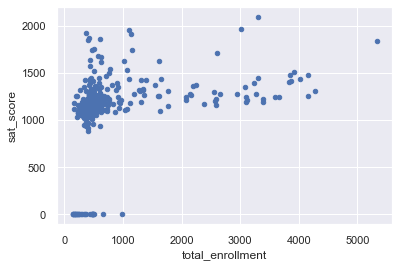

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
combined.plot.scatter(x='total_enrollment',y='sat_score')


Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

1. Filter the combined dataframe to keep only those rows where total_enrollment is under 1000 and sat_score is under 1000. Assign the result to low_enrollment.
2. Display all of the items in the School Name column of low_enrollment.
3. Use Wikipedia and Google to research the names of the schools. Can you discover anything interesting about them?

In [23]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
low_enrollment['School Name'].value_counts()

PAN AMERICAN INTERNATIONAL HIGH SCHOO    1
INTERNATIONAL HIGH SCHOOL AT PROSPECT    1
INTERNATIONAL COMMUNITY HIGH SCHOOL      1
BROOKLYN INTERNATIONAL HIGH SCHOOL       1
HIGH SCHOOL OF WORLD CULTURES            1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS    1
IT TAKES A VILLAGE ACADEMY               1
BRONX INTERNATIONAL HIGH SCHOOL          1
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL    1
MULTICULTURAL HIGH SCHOOL                1
FOUNDATIONS ACADEMY                      1
Name: School Name, dtype: int64

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

We learned how to use the Basemap package to create maps in the Visualizing Geographic Data mission. The Basemap package enables us to create high-quality maps, plot points over them, and then draw coastlines and other features.

We extracted the coordinates for all of the schools earlier, and stored them in the lat and lon columns. The coordinates will enable us to plot all of the schools on a map of New York City.

We can set up the map with this code:
```python
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
```
This code snippet will create a map that centers on New York City (llcrnrlat, urcrnrlat, llcrnrlon, and urcrnrlon define the corners of the geographic area the map depicts). It will also draw coastlines and rivers accordingly.

Now all we need to do is convert our lat and lon coordinates to x and y coordinates so we can plot them on top of the map. This will show us where all of the schools in our data set are located.

As you may recall, in order to plot coordinates using Basemap, we need to:

Convert the pandas series containing the latitude and longitude coordinates to lists using the pandas.Series.tolist() method.
Make a scatterplot using the longitudes and latitudes with the scatter() method on the Basemap object.
Show the plot using the pyplot.show() method.
We also need to make sure we pass a few keyword arguments to the scatter() method:
<pre>
s - Determines the size of the point that represents each school on the map.
zorder - Determines where the method draws the points (that represent schools) on the z axis. In other words, it determines the order of the layers on the map. If we set zorder to 2, the method will draw the points on top of the continents, which is where we want them.
latlon - A Boolean value that specifies whether we're passing in latitude and longitude coordinates instead of x and y plot coordinates.
</pre>
1. Set up the map using the code snippet you saw above -- the one that creates a map, then draws rivers, coastlines, and boundaries.
2. Convert the lon column of combined to a list, and assign it to the longitudes variable.
3. Convert the lat column of combined to a list, and assign it to the latitudes variable.
4. Call the Basemap.scatter() method on m, and pass in longitudes and latitudes as arguments.
5. Make sure to pass in longitudes and latitudes in the correct order.
6. Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
7. Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
8. Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
9. Show the plot using the pyplot.show() method.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


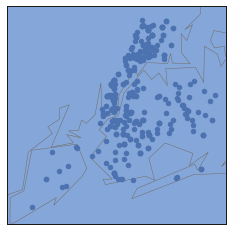

In [24]:
from mpl_toolkits.basemap import Basemap

longitudes = combined.lon.tolist()
latitudes = combined.lat.tolist()
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()


1. Set up the map using the code snippet that creates a map, then draws rivers, coastlines, and boundaries.
2. Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=20 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value combined["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
3. Show the plot using the show() method.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


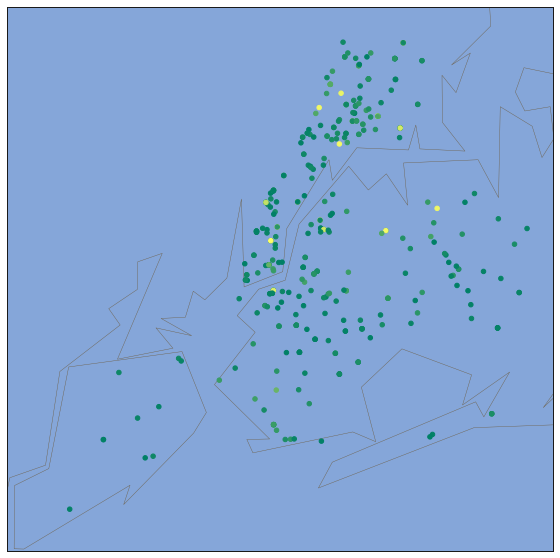

In [25]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
plt.figure(figsize=(12,10))
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined['ell_percent'], cmap='summer')
plt.show()

In [28]:
import numpy
districts = combined.groupby('school_dist').agg(numpy.mean).reset_index()
districts.head()

,school_dist,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,...,postcode,total_students,number_programs,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,1354.500000,104.333333,149.000000,100.500000,93.500000,71.333333,66.416667,90.616667,15.683333,...,10003.166667,659.500000,1.333333,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,1142.708333,128.814815,205.000000,161.541667,152.634146,76.307317,65.329268,84.973171,18.502439,...,10023.770833,621.395833,1.416667,4.148936,2.553191,1076.574468,1.039357e+06,1.007627e+09,40.739699,-73.991386
2,03,987.583333,194.200000,311.000000,312.000000,179.888889,75.222222,66.055556,86.288889,17.011111,...,10023.750000,717.916667,2.000000,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,1224.142857,129.000000,166.333333,145.000000,113.857143,76.257143,57.428571,72.185714,14.100000,...,10029.857143,580.857143,1.142857,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,1110.285714,68.400000,83.200000,115.000000,123.600000,77.100000,73.480000,94.920000,25.280000,...,10030.142857,609.857143,1.142857,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


1. Use the code snippet from before that creates a map, then draws rivers, coastlines, and boundaries.
2. Convert the lon column of districts to a list, and assign it to the longitudes variable.
3. Convert the lat column of districts to a list, and assign it to the latitudes variable.
4. Call the scatter() method on m, and pass in longitudes and latitudes as arguments.
    - Make sure to pass in longitudes and latitudes in the correct order.
    - Pass in the keyword argument s=50 to increase the size of the points in the scatterplot.
    - Pass in the keyword argument zorder=2 to plot the points on top of the rest of the map. Otherwise the method will draw the points underneath the land.
    - Pass in the keyword argument latlon=True to indicate that we're passing in latitude and longitude coordinates, rather than axis coordinates.
    - Pass in the keyword argument c with the value districts["ell_percent"] to plot the ell_percent.
    - Pass in the keyword argument cmap="summer" to get the right color scheme.
5. Show the plot using the show() method.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


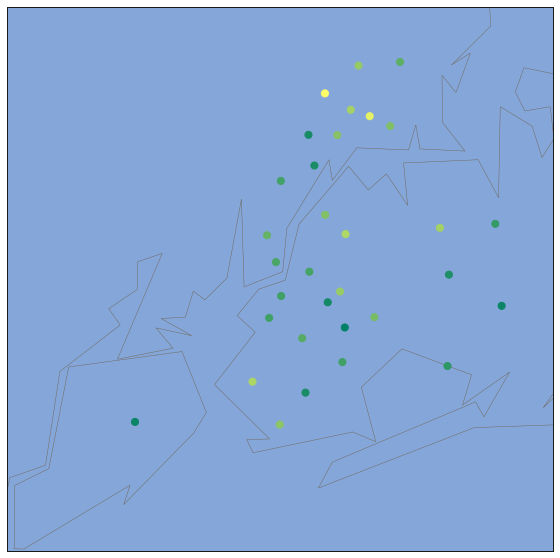

In [30]:
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
longitudes = list(districts.lon)
latitudes = list(districts.lat)
plt.figure(figsize=(12,10))
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts['ell_percent'], cmap='summer')
plt.show()